In [18]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [2]:
np.random.seed(0)


In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

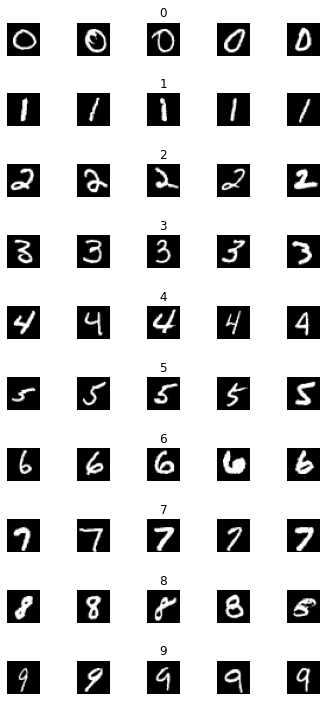

In [5]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


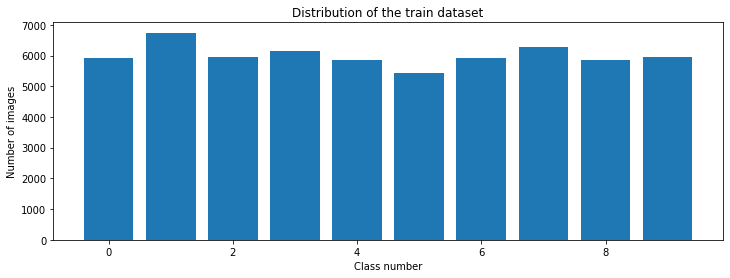

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [9]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation = 'relu' ))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [10]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [11]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 13s 9ms/step - loss: 0.2178 - accuracy: 0.9305 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.0409 - val_accuracy: 0.9882
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0501 - val_accuracy: 0.9863
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0384 - val_accuracy: 0.9908
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0502 - val_accuracy: 0.9882
Epoch

Text(0.5, 0, 'epoch')

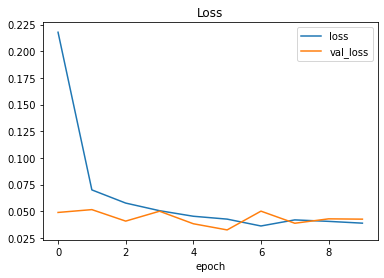

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

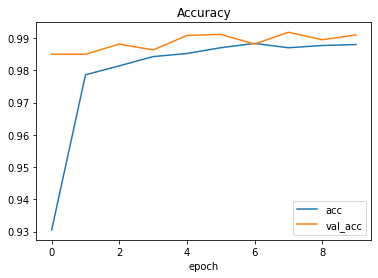

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

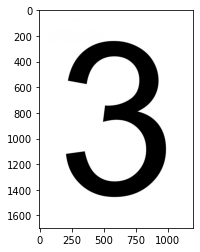

In [14]:
import requests
from PIL import Image
 
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

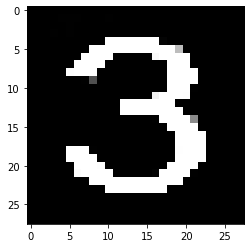

In [15]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 

In [16]:
img = img/255
img = img.reshape(1, 28,28,1)
 
prediction = np.argmax(model.predict(img),axis=1)
print("predicted digit:", str(prediction))

predicted digit: [3]


In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.027595745399594307
Test accuracy: 0.9919000267982483


In [24]:
layer1 = Model(inputs=model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs = model.layers[2].output)

visual_layer1 = layer1.predict(img)
visual_layer2 = layer2.predict(img)

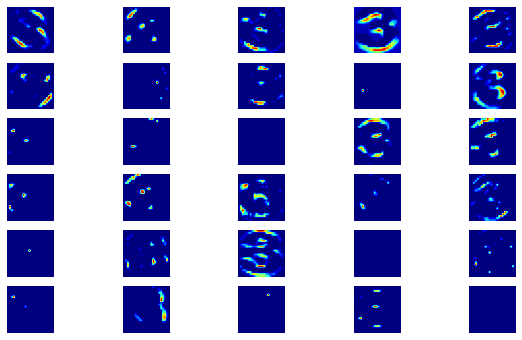

In [26]:
plt.figure(figsize= (10,6))

for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')


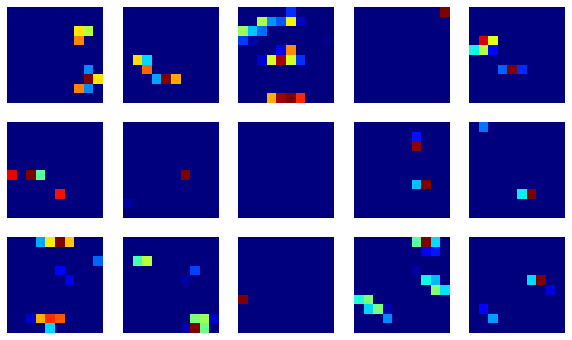

In [27]:
plt.figure(figsize= (10,6))

for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')
